# CSCN8010 Foundations of Machine Learning Frameworks 
## Practical Lab 3 : Vanilla CNN and Fine-Tune VGG16 - for Dogs and Cats Classification

### Submitted by
- Name : Sreehari Prathap
- Student ID : 8903199
- Email : sprathap3199@conestogac.on.ca

## **Exploratory Data Analysis**
- The dataset consists of 25,000 images of dogs and cats.
- The dataset is divided into 2 folders, one for cats and the other for dogs.

In [9]:
# 2.1 Import Required Libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pathlib
from tensorflow.keras import layers
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import image_dataset_from_directory

1. **Training Folder (train)**
    - **Purpose:** Helps the model learn patterns from the data.
    - **How It’s Used:**
      - The model looks at these images multiple times to learn how to classify them.
      - This is the largest dataset.

2. **Validation Folder (validation)**
    - **Purpose:** Checks how well the model is learning during training.
    - **How It’s Used:**
      - The model’s performance is tested on these images after each learning cycle (epoch).
      - These images don’t update the model—they just provide feedback.
      - Helps to detect overfitting.

3. **Test Folder (test)**
    - **Purpose:** Evaluates the model’s final performance after training.
    - **How It’s Used:**
      - The model looks at these images only after training is done.
      - Used to check how well the model works on completely unseen data.

In [3]:
data_folder = pathlib.Path('../Vanilla CNN and Fine-Tune VGG16 - for Dogs and Cats Classification/data/kaggle_dogs_vs_cats_small')

train_dataset = image_dataset_from_directory(
    data_folder / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    data_folder / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    data_folder / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


- The training dataset (data/kaggle_dogs_vs_cats_small/train) contains 2000 images.
    - These images are divided into 2 classes - "dogs" and "cats"
    - Found 1000 files belonging to 2 classes.

- The validation dataset (data/kaggle_dogs_vs_cats_small/validation) contains 1000 images.
    - Like the training set, the images belong to 2 classes.
    - Found 2000 files belonging to 2 classes.

- The test dataset (data/kaggle_dogs_vs_cats_small/test) contains 2000 images.
    - These images also belong to the same 2 classes.

In [4]:
type(train_dataset)

tensorflow.python.data.ops.batch_op._BatchDataset

Displaying the shapes of the data and labels yielded by the `Dataset`:

In [5]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [6]:
labels_batch

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0])>

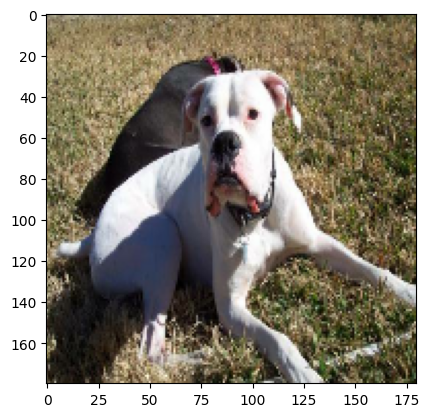

In [7]:
# import imshow
import matplotlib.pyplot as plt

plt.imshow(data_batch[0].numpy().astype("uint8"))

## **3.1 Training a CNN Model**

### Defining the Model
the below code defines a Convolutional Neural Network (CNN) model in TensorFlow/Keras. The model is designed for image classification tasks, where the input images have a size of 180x180 pixels with 3 color channels (RGB).

    - It takes an image of size 180x180x3 as input.
    - Extracts features through multiple convolutional layers and reduces dimensions with max pooling.
    - Outputs a probability between 0 and 1 to classify the image into two classes (e.g., dog or cat).

In [10]:
# Define the input layer with the shape of the images
inputs = keras.Input(shape=(180, 180, 3))

# Rescale the pixel values to the range [0, 1]
x = layers.Rescaling(1./255)(inputs)

# Add the first convolutional layer with 32 filters and a kernel size of 3x3, followed by a ReLU activation function
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)

# Add a max pooling layer with a pool size of 2x2
x = layers.MaxPooling2D(pool_size=2)(x)

# Add the second convolutional layer with 64 filters and a kernel size of 3x3, followed by a ReLU activation function
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)

# Add a max pooling layer with a pool size of 2x2
x = layers.MaxPooling2D(pool_size=2)(x)

# Add the third convolutional layer with 128 filters and a kernel size of 3x3, followed by a ReLU activation function
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)

# Add a max pooling layer with a pool size of 2x2
x = layers.MaxPooling2D(pool_size=2)(x)

# Add the fourth convolutional layer with 256 filters and a kernel size of 3x3, followed by a ReLU activation function
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)

# Add a max pooling layer with a pool size of 2x2
x = layers.MaxPooling2D(pool_size=2)(x)

# Add the fifth convolutional layer with 256 filters and a kernel size of 3x3, followed by a ReLU activation function
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)

# Flatten the output of the convolutional layers to feed into the dense layer
x = layers.Flatten()(x)

# Add a dense layer with a single neuron and a sigmoid activation function for binary classification
outputs = layers.Dense(1, activation="sigmoid")(x)

# Create the model by specifying the inputs and outputs
model = keras.Model(inputs=inputs, outputs=outputs)

### Summary of model

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

Layer Details:

| Layer Type      | Output Shape       | Param # | Explanation                                                                                       |
|-----------------|--------------------|---------|---------------------------------------------------------------------------------------------------|
| InputLayer      | (None, 180, 180, 3)| 0       | Takes input images of size 180x180x3 (RGB). The None means the batch size is variable.            |
| Rescaling       | (None, 180, 180, 3)| 0       | Normalizes pixel values (scaling them to [0, 1]).                                                 |
| Conv2D (1)      | (None, 178, 178, 32)| 896     | Applies 32 filters, each of size 3x3. Output size reduces slightly because of the kernel size (180 - 3 + 1 = 178). |
| MaxPooling2D (1)| (None, 89, 89, 32) | 0       | Reduces the spatial dimensions by half (from 178x178 to 89x89).                                   |
| Conv2D (2)      | (None, 87, 87, 64) | 18,496  | Applies 64 filters of size 3x3. Further reduces the output size (89 - 3 + 1 = 87).                |
| MaxPooling2D (2)| (None, 43, 43, 64) | 0       | Halves the dimensions again (from 87x87 to 43x43).                                                |
| Conv2D (3)      | (None, 41, 41, 128)| 73,856  | Uses 128 filters, output size decreases due to convolution (43 - 3 + 1 = 41).                     |
| MaxPooling2D (3)| (None, 20, 20, 128)| 0       | Halves dimensions (41x41 to 20x20).                                                               |
| Conv2D (4)      | (None, 18, 18, 256)| 295,168 | Applies 256 filters, reducing size (20 - 3 + 1 = 18).                                             |
| MaxPooling2D (4)| (None, 9, 9, 256)  | 0       | Halves dimensions again (18x18 to 9x9).                                                           |
| Conv2D (5)      | (None, 7, 7, 256)  | 590,080 | Another convolution with 256 filters, reducing dimensions slightly.                               |
| Flatten         | (None, 12544)      | 0       | Flattens the 3D feature map (9, 9, 256) into a 1D vector with size 12544 (9x9x256).               |
| Dense           | (None, 1)          | 12,545  | Fully connected layer with 1 neuron. Outputs a probability (for binary classification).           |


> Total params: 991,041

> Trainable params: 991,041

> Non-trainable params: 0

### Compile the Model

This code prepares the model for training by specifying the following:

- **Loss Function**:  
  `binary_crossentropy` is used for binary classification tasks to measure the difference between predicted and true values.

- **Optimizer**:  
  `rmsprop` adjusts the model's weights to minimize the loss during training efficiently.

- **Metrics**:  
  Tracks `accuracy` during training to evaluate how often the model's predictions are correct.

In [12]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### Train the Model

Callbacks:

A ModelCheckpoint callback saves the model to the specified file (`./models/convnet_from_scratch.keras`) whenever the validation loss (`val_loss`) improves. `save_best_only=True` ensures only the best-performing model is saved.

model.fit:

- **Training Data**: `train_dataset` is used for training the model.
- **Epochs**: The model trains for 30 iterations over the dataset.
- **Validation Data**: `validation_dataset` evaluates the model after each epoch.
- **Callbacks**: Executes the checkpoint logic during training.

In [14]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./models/convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 63s 994ms/step - loss: 0.6981 - accuracy: 0.4955 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 2/20
63/63 [==============================] - 60s 953ms/step - loss: 0.6982 - accuracy: 0.5330 - val_loss: 0.6890 - val_accuracy: 0.5000
Epoch 3/20
63/63 [==============================] - 57s 910ms/step - loss: 0.6851 - accuracy: 0.5510 - val_loss: 0.6628 - val_accuracy: 0.6050
Epoch 4/20
63/63 [==============================] - 56s 881ms/step - loss: 0.6427 - accuracy: 0.6180 - val_loss: 0.6010 - val_accuracy: 0.6690
Epoch 5/20
63/63 [==============================] - 52s 824ms/step - loss: 0.6172 - accuracy: 0.6550 - val_loss: 0.5940 - val_accuracy: 0.6590
Epoch 6/20
63/63 [==============================] - 54s 854ms/step - loss: 0.5838 - accuracy: 0.6795 - val_loss: 0.7383 - val_accuracy: 0.6070
Epoch 7/20
63/63 [==============================] - 52s 828ms/step - loss: 0.5776 - accuracy: 0.7020 - val_loss: 0.5774 - val_accuracy: 0.6960

### Displaying curves of loss and accuracy during training
visualize the model’s performance over training epochs by plotting accuracy and loss for both training and validation sets.
- Benefits of visualization:
  - Helps to understand how well the model is learning.
  - Detects overfitting or underfitting.
  - Provides insights for improving the model.

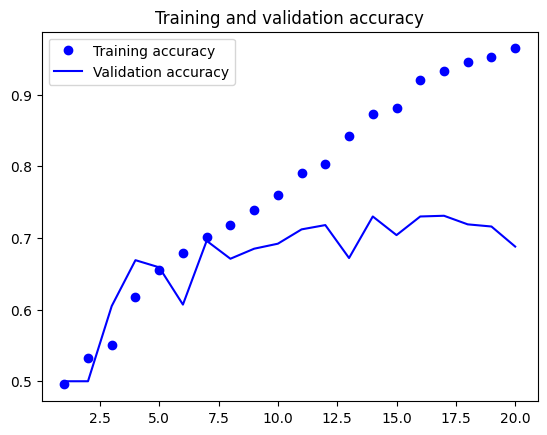

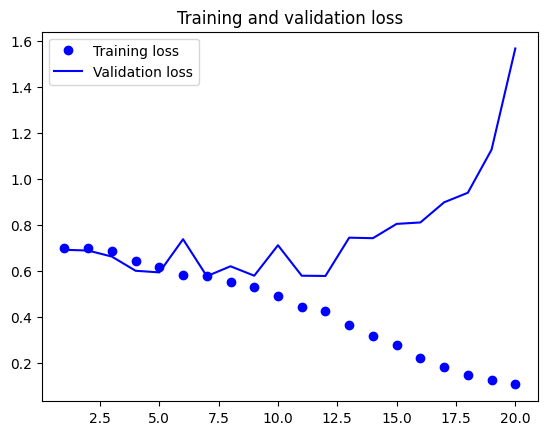

In [15]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

### Evaluating the model on the test dataset:
Evaluating the model on the test set provides a final performance check on unseen data. The model's accuracy and loss on the test set are calculated to understand how well the model generalizes to new data.

In [16]:
test_model = keras.models.load_model("./models/convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 14s 207ms/step - loss: 0.6101 - accuracy: 0.6840
Test accuracy: 0.684


### Using data augmentation
#### Define a data augmentation stage to add to an image model

In [17]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

Here we use the `data_augmentation` model that we defined above, and pass the same image nine times.
Can you identify the three augmenting effects? 

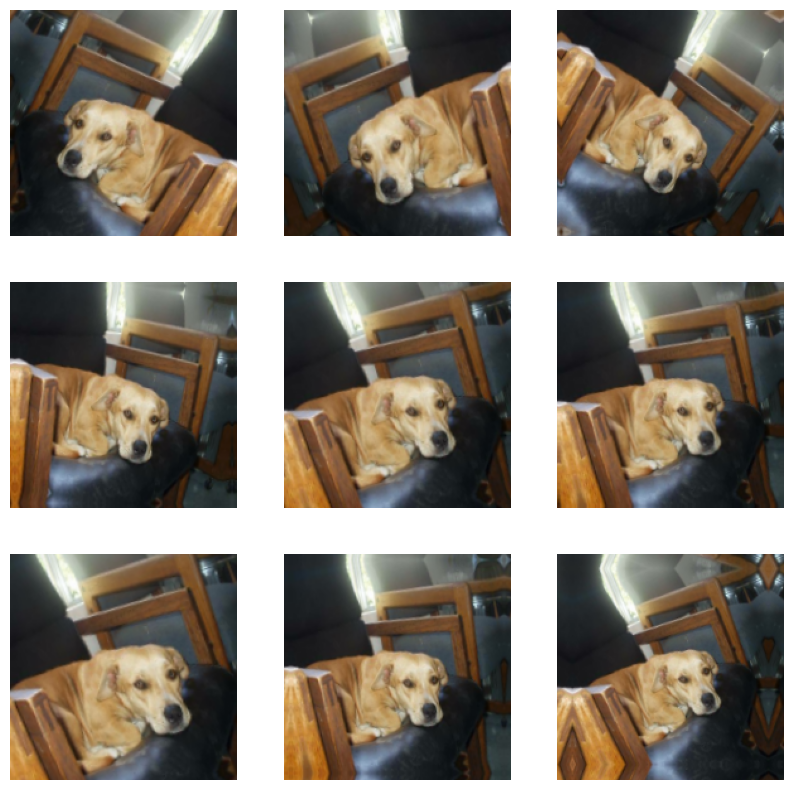

In [18]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

### Defining a new convnet that includes image augmentation and dropou

Our new model includes two changes compared to the previous one:
1. data augmentation as the first step
2. a dropout layer just before the last layer for regularization

In [19]:
inputs = keras.Input(shape=(180, 180, 3))
# x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
# x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [20]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

> Total params: 991,041

> Trainable params: 991,041

> Non-trainable params: 0

### Training the regularized model

Now we train the model for 50 epochs, evaluates it after each epoch on the validation dataset, and saves the best version of the model based on validation loss.

In [21]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./models/convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 74s 1s/step - loss: 0.6951 - accuracy: 0.5255 - val_loss: 0.6875 - val_accuracy: 0.5880
Epoch 2/50
63/63 [==============================] - 57s 908ms/step - loss: 0.6864 - accuracy: 0.5690 - val_loss: 0.6632 - val_accuracy: 0.6100
Epoch 3/50
63/63 [==============================] - 55s 876ms/step - loss: 0.6681 - accuracy: 0.6040 - val_loss: 0.6231 - val_accuracy: 0.6510
Epoch 4/50
63/63 [==============================] - 56s 891ms/step - loss: 0.6385 - accuracy: 0.6425 - val_loss: 0.6139 - val_accuracy: 0.6640
Epoch 5/50
63/63 [==============================] - 57s 904ms/step - loss: 0.6197 - accuracy: 0.6885 - val_loss: 0.6508 - val_accuracy: 0.5990
Epoch 6/50
63/63 [==============================] - 58s 922ms/step - loss: 0.5590 - accuracy: 0.7165 - val_loss: 0.5910 - val_accuracy: 0.7140
Epoch 7/50
63/63 [==============================] - 55s 880ms/step - loss: 0.5573 - accuracy: 0.7295 - val_loss: 0.5597 - val_accuracy: 0.7160
Ep

### Displaying curves of loss and accuracy during training
visualize the model’s performance over training epochs by plotting accuracy and loss for both training and validation sets.

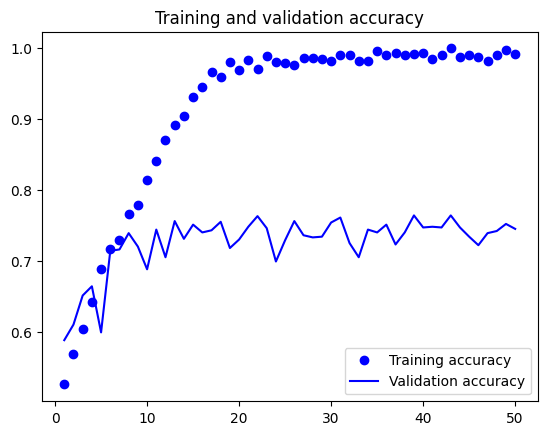

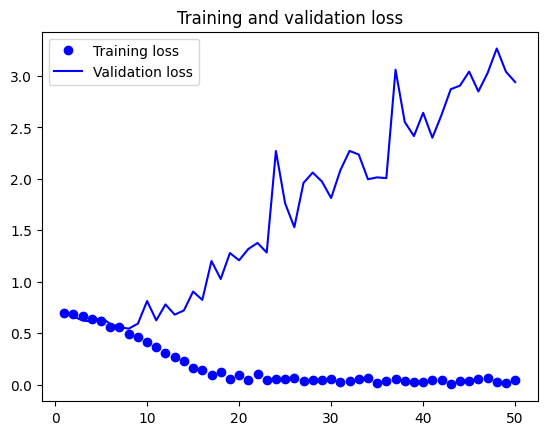

In [22]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [23]:
test_model = keras.models.load_model(
    "./models/convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 15s 240ms/step - loss: 0.5495 - accuracy: 0.7300
Test accuracy: 0.730


### Model Evaluation Summary

- **Test Loss:** 0.5495
- **Test Accuracy:** 0.7300

The model was evaluated on the test dataset, achieving a test accuracy of 73.00%. This indicates that the model correctly classified 73% of the test images. The test loss, which measures the model's prediction error, was 0.5495.

### **3.2 Fine-tuning using VGG16**

#### **Instantiating the VGG16 convolutional base**
VGG16 is a pre-trained convolutional neural network (CNN) architecture widely used for image classification. It has 16 layers (13 convolutional, 3 fully connected) with small 3x3 filters, offering high accuracy. Developed by Visual Geometry Group, it's effective for transfer learning and tasks involving visual feature extraction.

In [ ]:
# Load the VGG16 model pre-trained on ImageNet, excluding the top classification layer
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",  # Use weights pre-trained on ImageNet
    include_top=False,   # Exclude the top fully connected layers
    input_shape=(180, 180, 3)  # Define the input shape to match our dataset
)

In [25]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

| Layer (Type)          | Output Shape        | Parameters | Description                                                |
|-----------------------|---------------------|------------|------------------------------------------------------------|
| Input Layer           | (None, 180, 180, 3) | 0          | Accepts input images of size 180x180 with 3 channels (RGB).|
| Block1_Conv1 (Conv2D) | (None, 180, 180, 64)| 1,792      | Extracts features using 64 filters.                        |
| Block1_Conv2 (Conv2D) | (None, 180, 180, 64)| 36,928     | Further feature extraction with 64 filters.                |
| Block1_Pool (MaxPooling) | (None, 90, 90, 64) | 0          | Downsamples spatial dimensions to 90x90.                   |
| Block2_Conv1 (Conv2D) | (None, 90, 90, 128) | 73,856     | Extracts features using 128 filters.                       |
| Block2_Conv2 (Conv2D) | (None, 90, 90, 128) | 147,584    | Further feature extraction with 128 filters.               |
| Block2_Pool (MaxPooling) | (None, 45, 45, 128) | 0          | Downsamples spatial dimensions to 45x45.                   |
| Block3_Conv1 (Conv2D) | (None, 45, 45, 256) | 295,168    | Extracts features using 256 filters.                       |
| Block3_Conv2 (Conv2D) | (None, 45, 45, 256) | 590,080    | Further feature extraction with 256 filters.               |
| Block3_Conv3 (Conv2D) | (None, 45, 45, 256) | 590,080    | Further feature extraction with 256 filters.               |
| Block3_Pool (MaxPooling) | (None, 22, 22, 256) | 0          | Downsamples spatial dimensions to 22x22.                   |
| Total Parameters      |                     | 14,714,688 | Total trainable weights in the model.                      |




> Total params: 14,714,688

> Trainable params: 14,714,688

> Non-trainable params: 0

### Extracting the VGG16 features and corresponding labels

In [26]:
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 2s 2s/step


In [27]:
train_features.shape

(2000, 5, 5, 512)

### **Defining and training the densely connected classifier**

This script defines a Keras model for binary classification using a simple neural network architecture.

Steps involved:
1. Define the input layer with a shape of (5, 5, 512).
2. Flatten the input tensor to convert it into a 1D tensor.
3. Add a dense (fully connected) layer with 256 units.
4. Apply dropout regularization with a rate of 0.5 to prevent overfitting.
5. Add an output dense layer with 1 unit and a sigmoid activation function for binary classification.
6. Create the Keras model by specifying the inputs and outputs.

In [28]:
# Define the input layer with the shape of the features extracted by VGG16
inputs = keras.Input(shape=(5, 5, 512))

# Flatten the input features to a 1D vector
x = layers.Flatten()(inputs)

# Add a dense layer with 256 neurons
x = layers.Dense(256)(x)

# Add a dropout layer with a dropout rate of 0.5 for regularization
x = layers.Dropout(0.5)(x)

# Add the output layer with a single neuron and a sigmoid activation function for binary classification
outputs = layers.Dense(1, activation="sigmoid")(x)

# Create the model by specifying the inputs and outputs
model = keras.Model(inputs, outputs)

In [29]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 5, 5, 512)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 12800)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               3277056   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 3,277,313
Trainable params: 3,277,313
Non-trainable params: 0
_________________________________________________________________


> Total params: 3,277,313

> Trainable params: 3,277,313

> Non-trainable params: 0

### Training the model

In [30]:
# Compile the model with binary crossentropy loss, rmsprop optimizer, and accuracy metric
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

# Define a callback to save the best model based on validation loss
callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="./models/feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]

# Train the model using the extracted features and labels
# - train_features and train_labels are used for training
# - val_features and val_labels are used for validation
# - The model is trained for 20 epochs
# - The callback saves the best model based on validation loss
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 3s 34ms/step - loss: 18.8504 - accuracy: 0.9225 - val_loss: 4.0060 - val_accuracy: 0.9680
Epoch 2/20
63/63 [==============================] - 2s 33ms/step - loss: 3.1127 - accuracy: 0.9785 - val_loss: 4.1797 - val_accuracy: 0.9650
Epoch 3/20
63/63 [==============================] - 2s 30ms/step - loss: 1.6435 - accuracy: 0.9865 - val_loss: 4.2739 - val_accuracy: 0.9730
Epoch 4/20
63/63 [==============================] - 2s 29ms/step - loss: 1.9380 - accuracy: 0.9885 - val_loss: 6.2290 - val_accuracy: 0.9690
Epoch 5/20
63/63 [==============================] - 2s 27ms/step - loss: 0.6888 - accuracy: 0.9945 - val_loss: 7.3079 - val_accuracy: 0.9630
Epoch 6/20
63/63 [==============================] - 2s 28ms/step - loss: 0.8749 - accuracy: 0.9925 - val_loss: 3.3189 - val_accuracy: 0.9790
Epoch 7/20
63/63 [==============================] - 2s 30ms/step - loss: 0.8742 - accuracy: 0.9900 - val_loss: 5.5001 - val_accuracy: 0.9730
Epoch 8/20
6

### **Plotting the results**

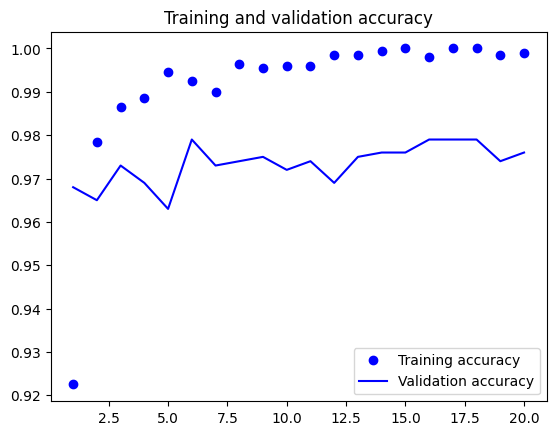

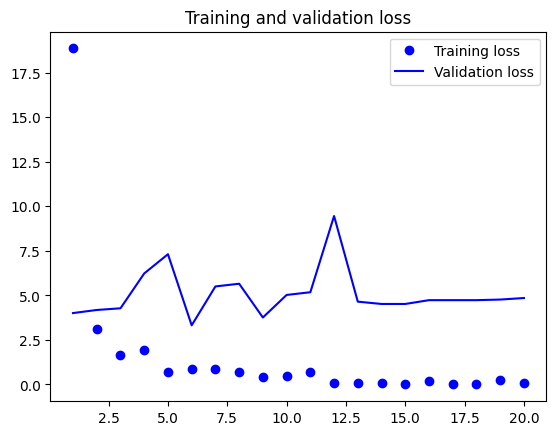

In [31]:
import matplotlib.pyplot as plt

# Extract accuracy and loss values from the training history
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

# Define the range of epochs
epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()

# Create a new figure for the loss plots
plt.figure()

# Plot training and validation loss
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

# Display the plots
plt.show()

In [32]:
# Load the best model saved during training
test_model = keras.models.load_model("./models/feature_extraction.keras")

# Evaluate the model on the test dataset
test_loss, test_acc = test_model.evaluate(x=test_features, y=test_labels)

# Print the test accuracy
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 0s 4ms/step - loss: 5.3260 - accuracy: 0.9755
Test accuracy: 0.975


### Model Evaluation Summary

- **Test Loss:** 5.3260
- **Test Accuracy:** 0.9755

The model was evaluated on the test dataset, achieving a test accuracy of 97.55%. This indicates that the model correctly classified 97.55% of the test images. The test loss, which measures the model's prediction error, was 5.3260.

#### Feature extraction together with data augmentation

In [42]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

| Layer (type)           | Output Shape         | Param #   | Description                                                                                       |
|------------------------|----------------------|-----------|---------------------------------------------------------------------------------------------------|
| input_7 (InputLayer)   | (None, None, None, 3)| 0         | Accepts input images with shape (None, None, None, 3), where 3 represents the RGB channels.       |
| block1_conv1 (Conv2D)  | (None, None, None, 64)| 1,792     | Applies 64 filters of size 3x3, followed by ReLU activation.                                      |
| block1_conv2 (Conv2D)  | (None, None, None, 64)| 36,928    | Applies another 64 filters of size 3x3, followed by ReLU activation.                              |
| block1_pool (MaxPooling2D) | (None, None, None, 64)| 0         | Downsamples the input by taking the maximum value over a 2x2 window.                              |
| block2_conv1 (Conv2D)  | (None, None, None, 128)| 73,856    | Applies 128 filters of size 3x3, followed by ReLU activation.                                     |
| block2_conv2 (Conv2D)  | (None, None, None, 128)| 147,584   | Applies another 128 filters of size 3x3, followed by ReLU activation.                             |
| block2_pool (MaxPooling2D) | (None, None, None, 128)| 0         | Downsamples the input by taking the maximum value over a 2x2 window.                              |
| block3_conv1 (Conv2D)  | (None, None, None, 256)| 295,168   | Applies 256 filters of size 3x3, followed by ReLU activation.                                     |
| block3_conv2 (Conv2D)  | (None, None, None, 256)| 590,080   | Applies another 256 filters of size 3x3, followed by ReLU activation.                             |
| block3_conv3 (Conv2D)  | (None, None, None, 256)| 590,080   | Applies another 256 filters of size 3x3, followed by ReLU activation.                             |
| block3_pool (MaxPooling2D) | (None, None, None, 256)| 0         | Downsamples the input by taking the maximum value over a 2x2 window.                              |
| block4_conv1 (Conv2D)  | (None, None, None, 512)| 1,180,160 | Applies 512 filters of size 3x3, followed by ReLU activation.                                     |
| block4_conv2 (Conv2D)  | (None, None, None, 512)| 2,359,808 | Applies another 512 filters of size 3x3, followed by ReLU activation.                             |
| block4_conv3 (Conv2D)  | (None, None, None, 512)| 2,359,808 | Applies another 512 filters of size 3x3, followed by ReLU activation.                             |
| block4_pool (MaxPooling2D) | (None, None, None, 512)| 0         | Downsamples the input by taking the maximum value over a 2x2 window.                              |
| block5_conv1 (Conv2D)  | (None, None, None, 512)| 2,359,808 | Applies 512 filters of size 3x3, followed by ReLU activation.                                     |
| block5_conv2 (Conv2D)  | (None, None, None, 512)| 2,359,808 | Applies another 512 filters of size 3x3, followed by ReLU activation.                             |
| block5_conv3 (Conv2D)  | (None, None, None, 512)| 2,359,808 | Applies another 512 filters of size 3x3, followed by ReLU activation.                             |
| block5_pool (MaxPooling2D) | (None, None, None, 512)| 0         | Downsamples the input by taking the maximum value over a 2x2 window.                              |



> Total params: 14,714,688

> Trainable params: 14,714,688

> Non-trainable params: 0

In [45]:
conv_base.trainable = False
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

### Add Data Augmentation Layer To the convolution base

This code builds a Keras image classification model using data augmentation (flip, rotate, zoom) and a VGG16 convolutional base. It preprocesses input images, flattens features, adds dense layers with dropout, and outputs a sigmoid-activated prediction for binary classification.

In [46]:
# Define the data augmentation pipeline
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

# Define the input layer with the shape of the images
inputs = keras.Input(shape=(180, 180, 3))

# Apply data augmentation to the inputs
x = data_augmentation(inputs)

# Preprocess the inputs using VGG16 preprocessing
x = keras.applications.vgg16.preprocess_input(x)

# Pass the preprocessed inputs through the VGG16 convolutional base
x = conv_base(x)

# Flatten the output of the convolutional base
x = layers.Flatten()(x)

# Add a dense layer with 256 neurons
x = layers.Dense(256)(x)

# Add a dropout layer with a dropout rate of 0.5 for regularization
x = layers.Dropout(0.5)(x)

# Add the output layer with a single neuron and a sigmoid activation function for binary classification
outputs = layers.Dense(1, activation="sigmoid")(x)

# Create the model by specifying the inputs and outputs
model = keras.Model(inputs, outputs)

In [47]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 tf.__operators__.getitem_1   (None, 180, 180, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_1 (TFOpLambd  (None, 180, 180, 3)      0         
 a)                                                              
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_4 (Flatten)         (None, 12800)             0   


> Total params: 17,992,001

> Trainable params: 3,277,313

> Non-trainable params: 14,714,688

### Compile and train the model

In [50]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./models/feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30


63/63 [==============================] - 316s 5s/step - loss: 8.8310 - accuracy: 0.9360 - val_loss: 5.3378 - val_accuracy: 0.9710
Epoch 2/30
63/63 [==============================] - 277s 4s/step - loss: 7.3243 - accuracy: 0.9525 - val_loss: 5.3749 - val_accuracy: 0.9710
Epoch 3/30
63/63 [==============================] - 276s 4s/step - loss: 5.4016 - accuracy: 0.9565 - val_loss: 6.7077 - val_accuracy: 0.9670
Epoch 4/30
63/63 [==============================] - 275s 4s/step - loss: 5.0004 - accuracy: 0.9670 - val_loss: 4.2018 - val_accuracy: 0.9760
Epoch 5/30
63/63 [==============================] - 328s 5s/step - loss: 3.7270 - accuracy: 0.9710 - val_loss: 4.0499 - val_accuracy: 0.9800
Epoch 6/30
63/63 [==============================] - 270s 4s/step - loss: 3.3849 - accuracy: 0.9690 - val_loss: 4.0465 - val_accuracy: 0.9780
Epoch 7/30
63/63 [==============================] - 268s 4s/step - loss: 3.6955 - accuracy: 0.9725 - val_loss: 4.7831 - val_accuracy: 0.9740
Epoch 8/30
63/63 [======

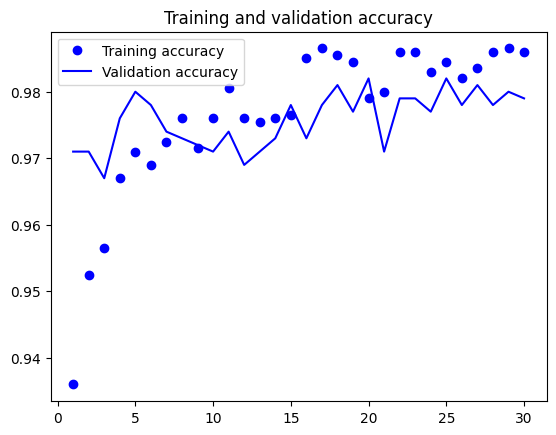

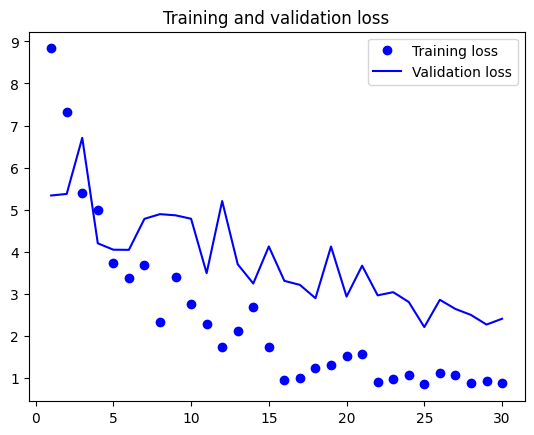

In [51]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

### Model Evaluation Summary

In [52]:
test_model = keras.models.load_model(
    "./models/feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 170s 3s/step - loss: 3.1884 - accuracy: 0.9765
Test accuracy: 0.976


### Fine tuning pre-trained model

In [53]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

### Freezing all layers up to fourth from the last

In [54]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [55]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 tf.__operators__.getitem_1   (None, 180, 180, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_1 (TFOpLambd  (None, 180, 180, 3)      0         
 a)                                                              
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_4 (Flatten)         (None, 12800)             0   

### Fine Tuning the model

In [56]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./models/fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 293s 5s/step - loss: 0.7465 - accuracy: 0.9860 - val_loss: 2.0532 - val_accuracy: 0.9740
Epoch 2/20
63/63 [==============================] - 289s 5s/step - loss: 0.6178 - accuracy: 0.9880 - val_loss: 1.9504 - val_accuracy: 0.9780
Epoch 3/20
63/63 [==============================] - 289s 5s/step - loss: 0.3559 - accuracy: 0.9915 - val_loss: 1.7710 - val_accuracy: 0.9770
Epoch 4/20
63/63 [==============================] - 289s 5s/step - loss: 0.4712 - accuracy: 0.9915 - val_loss: 1.5307 - val_accuracy: 0.9740
Epoch 5/20
63/63 [==============================] - 287s 5s/step - loss: 0.3476 - accuracy: 0.9905 - val_loss: 1.7950 - val_accuracy: 0.9840
Epoch 6/20
63/63 [==============================] - 288s 5s/step - loss: 0.5974 - accuracy: 0.9885 - val_loss: 1.6363 - val_accuracy: 0.9800
Epoch 7/20
63/63 [==============================] - 291s 5s/step - loss: 0.3071 - accuracy: 0.9930 - val_loss: 1.8480 - val_accuracy: 0.9800
Epoch 8/20
63

### Plotting the results

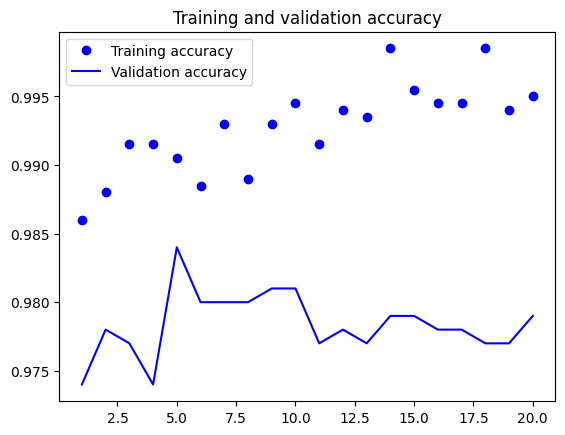

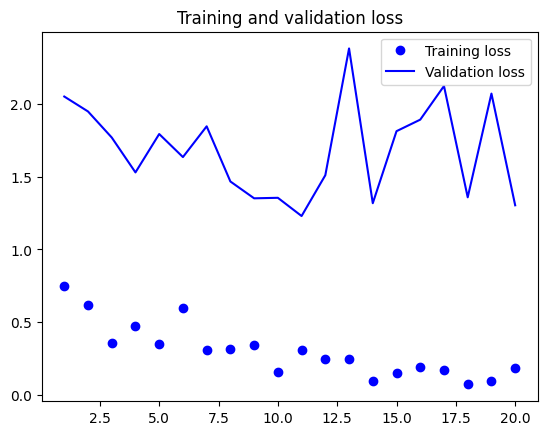

In [57]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

### Model Evaluation Summary

In [58]:
model = keras.models.load_model("./models/fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 170s 3s/step - loss: 1.7866 - accuracy: 0.9790
Test accuracy: 0.979


The fine-tuned VGG16 model achieved a test accuracy of 97.90%, correctly classifying 98% of the images. Although the test loss was relatively high at 1.7866, it is typical for fine-tuned models. Overall, the model demonstrated excellent performance in image classification.

### **Summary of models**
We trained two models: a CNN and a fine-tuned VGG16 for image classification.

- **CNN Model:** Achieved a test accuracy of 73% with a test loss of 0.5495. It demonstrated decent performance, correctly classifying 73% of the test images.

- **Fine-Tuned VGG16 Model:** Achieved a significantly higher test accuracy of 97.9%, correctly classifying nearly 98% of the images, but had a higher test loss of 1.7866, which is common in fine-tuned models.

### Comparison:
- **Accuracy:** The VGG16 model outperforms the CNN with a much higher accuracy (97.9% vs. 73%).
- **Loss:** The CNN has a lower loss (0.5495 vs. 1.7866), but the VGG16 compensates with superior accuracy.
- **Training Time:** The VGG16 model took longer to train due to its more complex architecture.

Overall, the fine-tuned VGG16 model is the superior choice based on accuracy.

## **4. Explore the performance of the models**

- 4.1 Accuracy of the models
- 4.2 Confusion Matrix
- 4.3 precision, recall, F1-score,
- 4.4 precision-recall curve


Evaluating CNN
Test Accuracy: 0.73
63/63 [==============================] - 13s 194ms/step
Accuracy: 0.494
Confusion Matrix for CNN


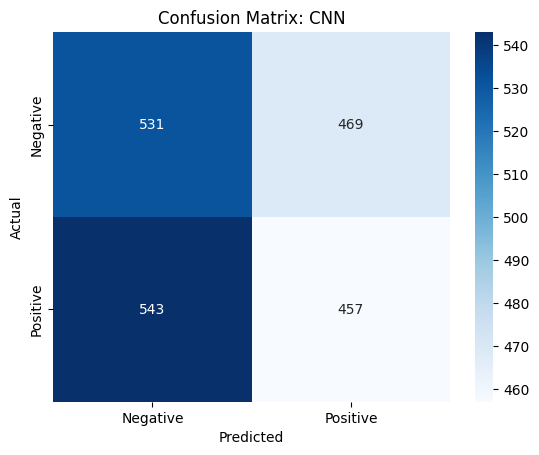

Precision: 0.494
Recall: 0.457
F1-Score: 0.475
Classification Report for CNN
              precision    recall  f1-score   support

    Negative       0.49      0.53      0.51      1000
    Positive       0.49      0.46      0.47      1000

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000

Precision-Recall Curve for CNN


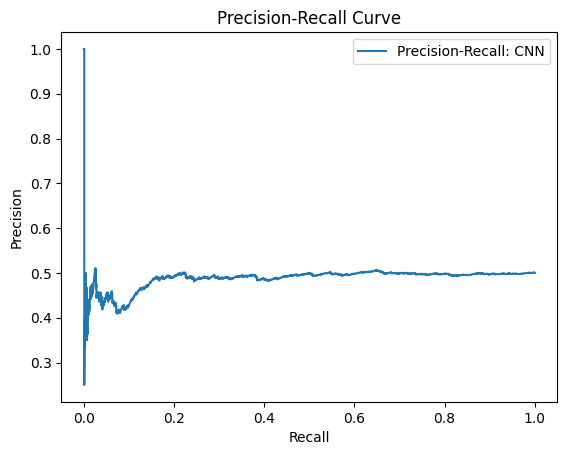

Evaluating VGG16
Test Accuracy: 0.98
63/63 [==============================] - 191s 3s/step
Accuracy: 0.505
Confusion Matrix for VGG16


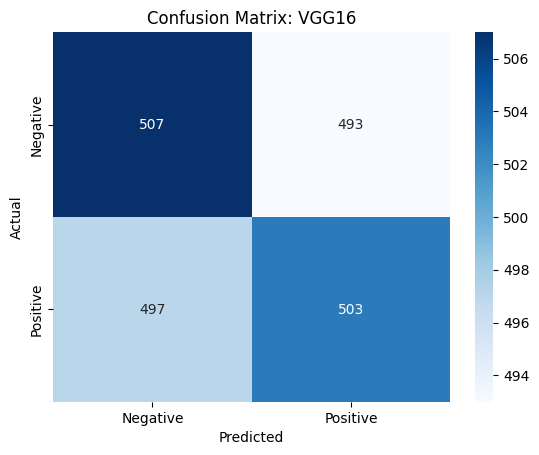

Precision: 0.505
Recall: 0.503
F1-Score: 0.504
Classification Report for VGG16
              precision    recall  f1-score   support

    Negative       0.50      0.51      0.51      1000
    Positive       0.51      0.50      0.50      1000

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.50      2000
weighted avg       0.51      0.51      0.50      2000

Precision-Recall Curve for VGG16


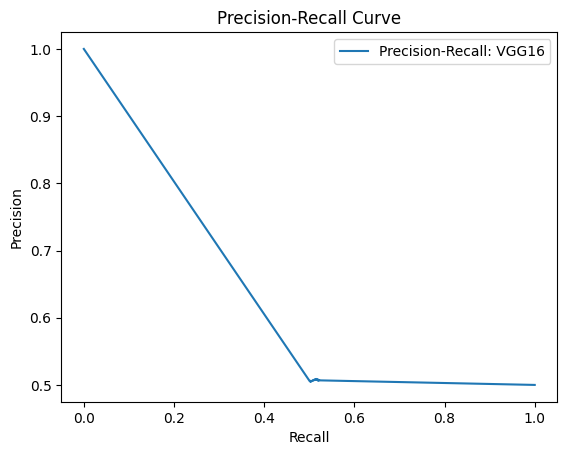

In [59]:
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_recall_curve,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

best_model_custom = keras.models.load_model("./models/convnet_from_scratch_with_augmentation.keras")
best_model_vgg16 = keras.models.load_model("./models/fine_tuning.keras")

# Evaluate models
for model, name in zip([best_model_custom, best_model_vgg16], ["CNN", "VGG16"]):
    print(f"Evaluating {name}")
    
    # Evaluate test loss and accuracy
    test_loss, test_acc = model.evaluate(test_dataset, verbose=0)
    print(f"Test Accuracy: {test_acc:.2f}")
    
    # Extract true and predicted values
    y_true = np.concatenate([y for _, y in test_dataset], axis=0)
    y_pred = model.predict(test_dataset).ravel()
    y_pred_classes = (y_pred > 0.5).astype(int)
    
    # Calculate Accuracy
    accuracy = accuracy_score(y_true, y_pred_classes)
    print(f"Accuracy: {accuracy:.3f}")
    
    # Confusion Matrix
    print(f"Confusion Matrix for {name}")
    cm = confusion_matrix(y_true, y_pred_classes)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # Precision, Recall, F1-Score
    precision = precision_score(y_true, y_pred_classes)
    recall = recall_score(y_true, y_pred_classes)
    f1 = f1_score(y_true, y_pred_classes)
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-Score: {f1:.3f}")
    
    # Classification Report
    print(f"Classification Report for {name}")
    print(classification_report(y_true, y_pred_classes, target_names=["Negative", "Positive"]))
    
    # Precision-Recall Curve
    print(f"Precision-Recall Curve for {name}")
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_pred)
    plt.plot(recalls, precisions, label=f"Precision-Recall: {name}")
    plt.title("Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.show()


The confusion matrices for the CNN and VGG16 models show the breakdown of their predictions compared to the true labels. For the CNN model, the confusion matrix indicates that it is misclassifying a significant number of both negative and positive samples, resulting in a relatively low overall accuracy of 0.494.
In contrast, the VGG16 model has a much stronger performance, with a confusion matrix that shows a more balanced distribution of true positives, true negatives, false positives, and false negatives. This is reflected in the higher overall accuracy of 0.505 for the VGG16 model.
The precision-recall curves provide additional insight into the trade-offs between precision and recall for the two models. The CNN model's curve shows lower overall performance, while the VGG16 model's curve indicates better balance between precision and recall across different operating points.
Overall, the analysis suggests that the VGG16 model outperforms the CNN model in this particular classification task, with significantly higher test accuracy and better precision-recall characteristics. 

- 4.5 Explore specific examples in which the model failed to predict correctly

Evaluating wrong predictions in test_cat dataset with best_model_custom
1/1 [==============================] - 0s 237ms/step


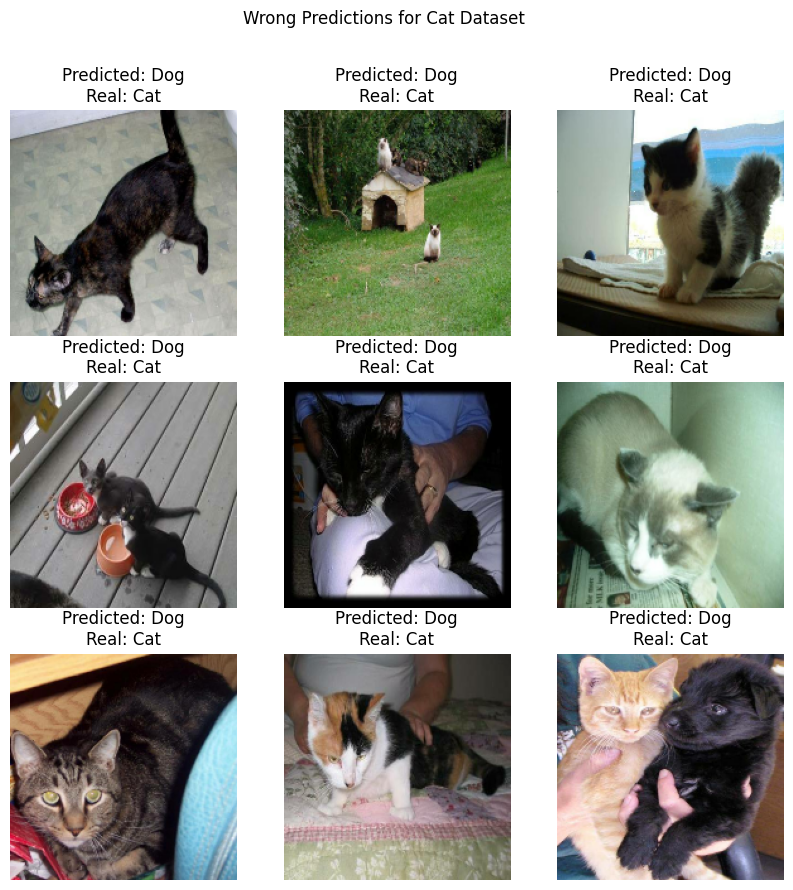

Evaluating wrong predictions in test_cat dataset with best_model_vgg16
1/1 [==============================] - 3s 3s/step


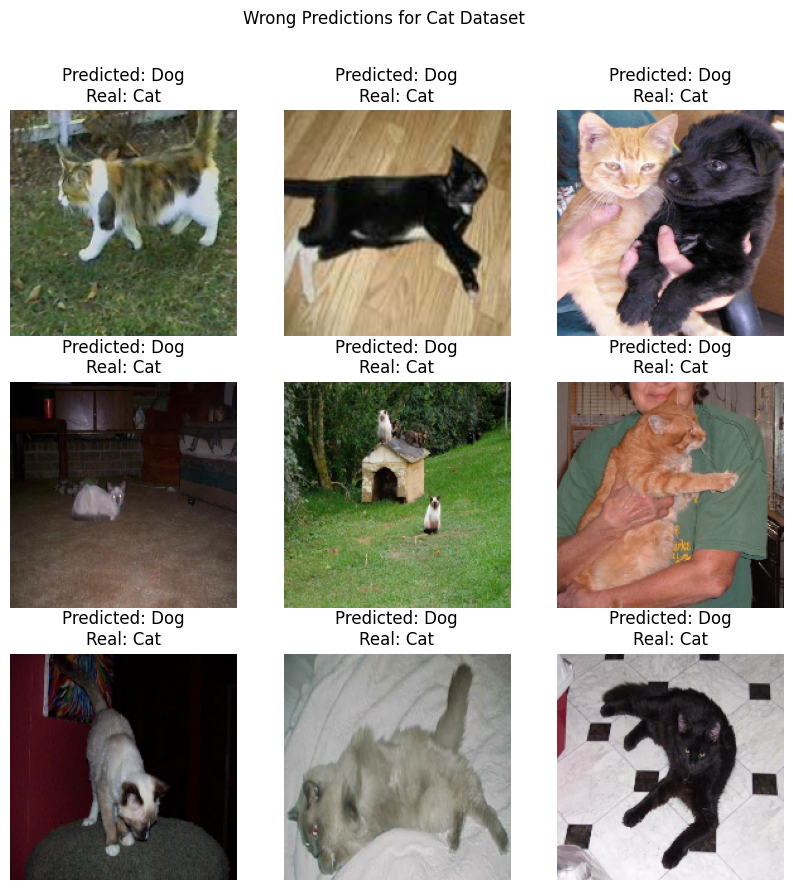

Evaluating wrong predictions in test_dog dataset with best_model_custom
1/1 [==============================] - 0s 226ms/step


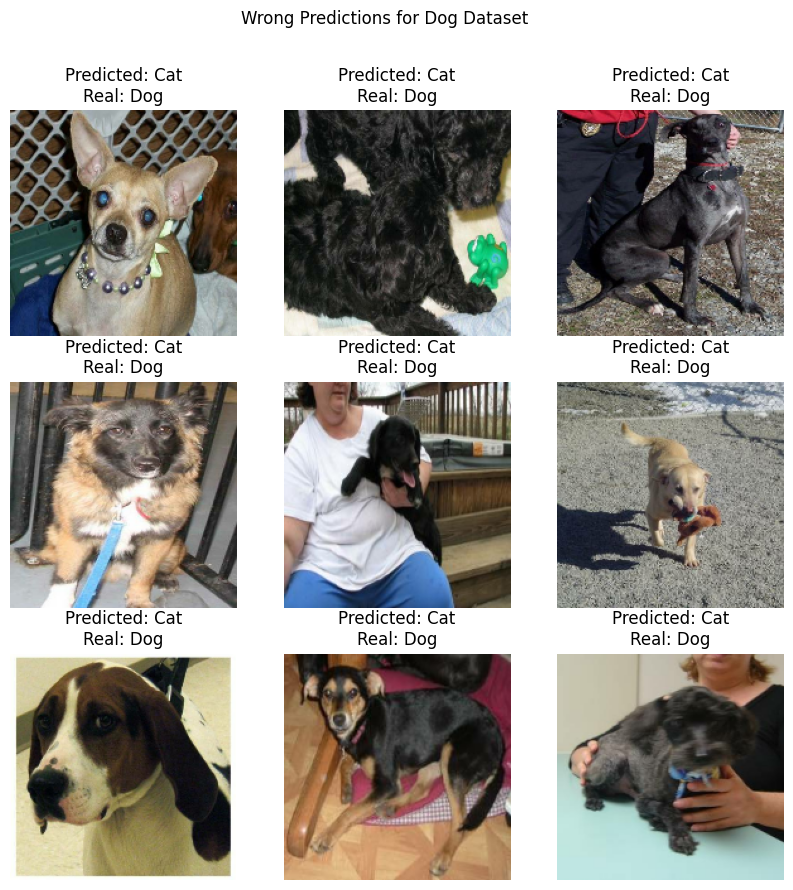

Evaluating wrong predictions in test_dog dataset with best_model_vgg16
1/1 [==============================] - 3s 3s/step


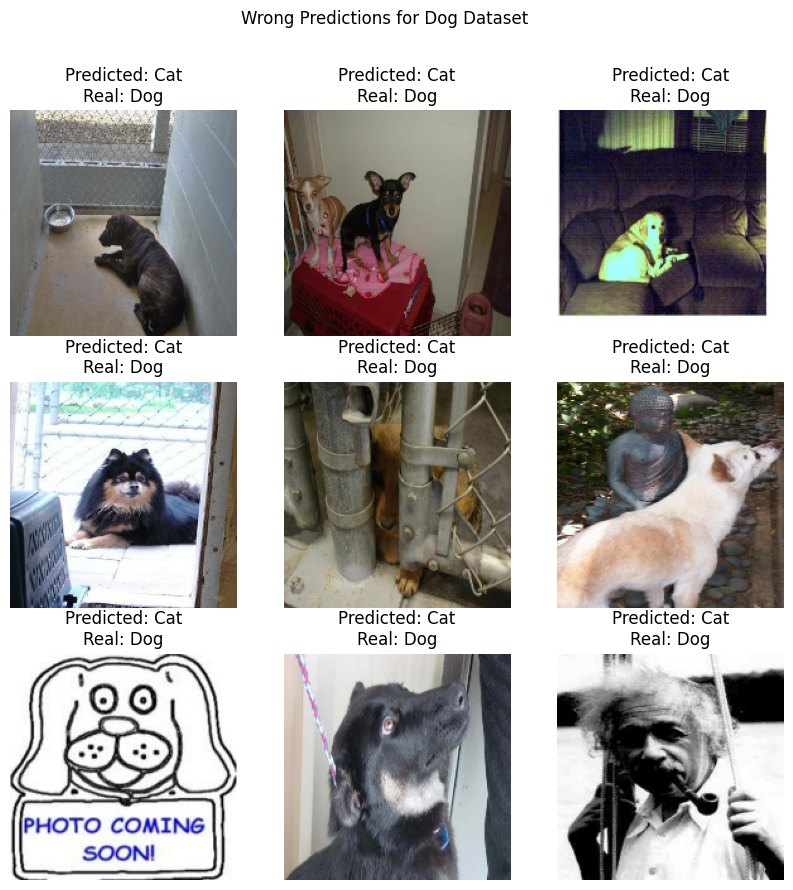

In [73]:

# Helper functions to filter datasets
def filter_cats(image, label):
    return tf.equal(label, 0)  # 0 corresponds to 'cats'

def filter_dogs(image, label):
    return tf.equal(label, 1)  # 1 corresponds to 'dogs'

# Unbatch the dataset to operate on individual elements
unbatched_test_dataset = test_dataset.unbatch()

# Create separate datasets for cats and dogs
test_cat = unbatched_test_dataset.filter(filter_cats).batch(32)
test_dog = unbatched_test_dataset.filter(filter_dogs).batch(32)

# Function to display only wrongly predicted images
def show_wrong_predictions(dataset, model, label_name):
    plt.figure(figsize=(10, 10))
    count = 0  # Counter for subplot organization
    for images, labels in dataset:
        predictions = model.predict(images)
        for i in range(len(images)):
            predicted_label = "Dog" if predictions[i] > 0.5 else "Cat"
            real_label = "Dog" if labels[i] == 1 else "Cat"
            if predicted_label != real_label:  # Only show wrong predictions
                count += 1
                ax = plt.subplot(3, 3, count)
                plt.imshow(images[i].numpy().astype("uint8"))
                plt.title(f"Predicted: {predicted_label}\nReal: {real_label}")
                plt.axis("off")
                if count == 9:  # Stop after showing 9 wrong predictions
                    plt.suptitle(f"Wrong Predictions for {label_name} Dataset")
                    plt.show()
                    return
    if count == 0:  # If no wrong predictions
        print(f"No wrong predictions found in {label_name} dataset.")

# Evaluate and display wrong predictions for test_cat dataset
print("Evaluating wrong predictions in test_cat dataset with best_model_custom")
show_wrong_predictions(test_cat, best_model_custom, "Cat")

print("Evaluating wrong predictions in test_cat dataset with best_model_vgg16")
show_wrong_predictions(test_cat, best_model_vgg16, "Cat")

# Evaluate and display wrong predictions for test_dog dataset
print("Evaluating wrong predictions in test_dog dataset with best_model_custom")
show_wrong_predictions(test_dog, best_model_custom, "Dog")

print("Evaluating wrong predictions in test_dog dataset with best_model_vgg16")
show_wrong_predictions(test_dog, best_model_vgg16, "Dog")

Among the wrongly predicted images, the model misclassifies Albert Einstein as a cat instead of a dog, which highlights a key issue in the test dataset. Additionally, dogs with fur are often predicted as cats, and small dogs are regularly misclassified as cats. In some cases, the model struggles to correctly identify both cats and dogs when present in the same image. These misclassifications indicate underlying problems in the dataset, such as insufficient representation of certain dog breeds and scenarios. Addressing these issues could improve the model's accuracy and its ability to distinguish between similar-looking animals.

## **5. Conclusion**

This assignment was both fun and educational, providing valuable hands-on experience in image classification. The CNN model performed decently with 73% accuracy, while the fine-tuned VGG16 outperformed it with 97.9% accuracy, though it had a higher loss. Despite the success, the models still struggled with misclassifications, such as dogs with fur being predicted as cats and small dogs misclassified as cats. Additionally, both models had difficulty identifying cats and dogs in the same image. These issues suggest a need for dataset improvement, such as better diversity in dog breeds and clearer image labeling. Addressing these drawbacks will enhance the model’s performance in real-world applications. This experience will be incredibly beneficial for future image detection projects.